In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

# Step 1: Load the Data
df = pd.read_csv('weather.csv')

# Step 2: Data Exploration
print(df.head(5))
print(df.info())
print(df.describe())


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

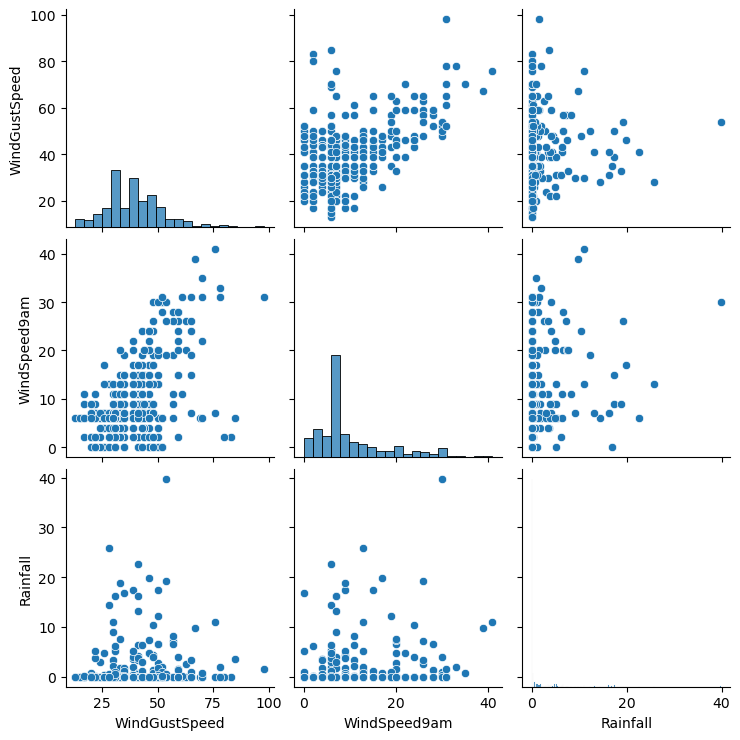

In [17]:
# Step 3: Data Visualization
#sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
sns.pairplot(df[['WindGustSpeed', 'WindSpeed9am', 'Rainfall']])
plt.show()

In [18]:
# Step 5: Data Analysis (analyze each term)
# Example: Calculate average MaxTemp by month
start_date = '2024-01-01'  # Define the start date
end_date = '2024-12-31'    # Define the end date
date_range = pd.date_range(start=start_date, end=end_date)

# Assign the date range to the 'Date' column
df['Date'] = date_range

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Calculate the average maximum temperature by month
monthly_avg_max_temp = df.groupby('Month')['MaxTemp'].mean()

# Display the result
print(monthly_avg_max_temp)

Month
1     24.903226
2     24.993103
3     29.309677
4     24.680000
5     25.987097
6     19.500000
7     17.232258
8     14.445161
9     11.690000
10    12.841935
11    18.013333
12    23.025806
Name: MaxTemp, dtype: float64


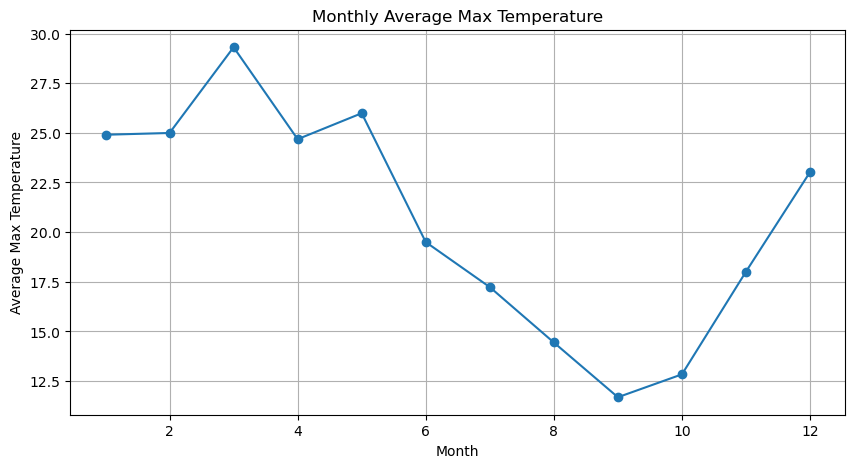

In [19]:

# Step 6: Data Visualization (Part 2)
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_max_temp.index, monthly_avg_max_temp.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.title('Monthly Average Max Temperature')
plt.grid(True)
plt.show()

In [23]:

# Step 7: Advanced Analysis (e.g., predict Rainfall)
# Prepare the data for prediction
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and calculate the Mean Squared Error
y_pred = model.predict((X_test))
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error for Rainfall Prediction: {mse}')


Mean Squared Error for Rainfall Prediction: 37.0768456005826


In [21]:

# Step 8: Conclusions and Insights (analyze each term)
# Example: Identify the highest and lowest rainfall months
highest_rainfall_month = monthly_avg_max_temp.idxmax()
lowest_rainfall_month = monthly_avg_max_temp.idxmin()
print(f'Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')


Highest rainfall month: 3, Lowest rainfall month: 9
